 ## German eBay Used Car Data Cleaning
 
In this notebook, I will be cleaning data entries representing used car listings scraped from German-language eBay, as well as analyzing this data

In [2]:
import numpy as np
import pandas as pd

autos = pd.read_csv("autos.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xdc in position 23: invalid continuation byte

It looks like utf-8 isn't the proper encoding type for the file. Let's try another

In [3]:
autos = pd.read_csv("autos.csv", encoding="Latin-1")

In [4]:
## Bingo! Now let's take a quick look at the dataframe as a whole
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [5]:
## And let's learn a bit more about the data
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [6]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


The vehicleType, gearbox, model, fuelType, and notRepairedDamage columns all have null values. In addition, the odometer and price columns could be converted into numeric columns.

In [7]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [8]:
autos.rename({'yearOfRegistration': 'registration_year',
             'monthOfRegistration': 'registration_month',
             'notRepairedDamage': 'unrepaired_damage',
             'dateCreated': 'ad_created',
             'dateCrawled': 'date_crawled',
             'offerType': 'offer_type',
             'vehicleType': 'vehicle_type',
             'powerPS': 'power_ps',
             'fuelType': 'fuel_type',
             'nrOfPictures': 'nr_of_pictures',
             'postalCode': 'postal_code',
             'lastSeen': 'last_seen'}, axis=1, inplace=True)

In [9]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


With this, I converted the camel case names into the more python-standard snake case. As well, I renamed a few of the columns to be more descriptive

In [10]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-30 19:48:02,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


From this, we see that 
* The seller and offer_type columns mostly have one value, which indicates that we may be better off just dropping these columns entirely
* The price and odometer columns could easily be reworked to simply be numeric columns
* the abtest column has only 2 values, but the split between them seems very even. Let's see what the distribution is

In [11]:
autos["abtest"].value_counts()

test       25756
control    24244
Name: abtest, dtype: int64

The labeling as test and control seems to indicate that some kind of experiment was done on this dataset. Interesting to keep in mind. Now, let's convert the odometer and price columns to numeric

In [12]:
autos["price"] = autos["price"].str.replace("$", "")
autos["price"] = autos["price"].str.replace(",", "")
autos["price"] = autos["price"].astype(int)

autos["odometer"] = autos["odometer"].str.replace(",", "")
autos["odometer"] = autos["odometer"].str.replace("km", "")
autos["odometer"] = autos["odometer"].astype(int)
autos.rename({"odometer": "odometer_km"}, axis=1, inplace=True)

In [13]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Now that we have the price and odometer_km columns as numeric, let's check for outliers

In [14]:
print(autos["price"].unique().shape)
print(autos["odometer_km"].unique().shape)

(2357,)
(13,)


The odometer column doesn't seem to have many unique values, whereas the price column does. Let's explore further:

In [15]:
autos["price"].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [16]:
autos["odometer_km"].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

Now let's look at the different values for odometer, as well as the outliers in price

In [17]:
autos["odometer_km"].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

In [18]:
autos["price"].value_counts().sort_index(ascending=False).head(10)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
Name: price, dtype: int64

In [19]:
autos["price"].value_counts().sort_index().head(10)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
Name: price, dtype: int64

It seems there are severe outliers with nonsensical prices that would throw off further analysis. Let's remove the listings with an exorbitant price, with a cap for it at \\$1,000,000, as well as prices that are too low, considering that these are used cars, so we'll make the minimum \\$100.

In [20]:
autos = autos[autos["price"].between(100, 1000000)]

In [21]:
autos["price"].describe()

count     48227.000000
mean       5992.208099
std       11994.952272
min         100.000000
25%        1250.000000
50%        3000.000000
75%        7499.000000
max      999999.000000
Name: price, dtype: float64

Although the mean is still considerably higher than the median, most likely due to the remaining presence of higher-priced listings, it is closer now. Most of the filtering though was the removal of the cars that had a price of $0, and other very low-price listings.  

Now let's look at the distribution of the date data. We will slice into just the first 10 characters at the beginning of the following three columns, since this is what contains the date information

In [22]:
autos["date_crawled"].str[:10].value_counts(normalize=True, dropna=False)

2016-04-03    0.038609
2016-03-20    0.037800
2016-03-21    0.037220
2016-03-12    0.036909
2016-03-14    0.036660
2016-04-04    0.036536
2016-03-07    0.036059
2016-04-02    0.035602
2016-03-28    0.034960
2016-03-19    0.034732
2016-03-15    0.034317
2016-03-29    0.034130
2016-03-30    0.033736
2016-04-01    0.033695
2016-03-08    0.033176
2016-03-09    0.033011
2016-03-22    0.032886
2016-03-11    0.032596
2016-03-26    0.032306
2016-03-10    0.032285
2016-03-23    0.032285
2016-03-31    0.031849
2016-03-17    0.031518
2016-03-25    0.031497
2016-03-27    0.031124
2016-03-16    0.029465
2016-03-24    0.029444
2016-03-05    0.025359
2016-03-13    0.015676
2016-03-06    0.014038
2016-04-05    0.013063
2016-03-18    0.012897
2016-04-06    0.003172
2016-04-07    0.001389
Name: date_crawled, dtype: float64

It looks like the crawling was done during March and early April of 2016

In [23]:
autos["ad_created"].str[:10].value_counts(normalize=True, dropna=False)

2016-04-03    0.038858
2016-03-20    0.037863
2016-03-21    0.037448
2016-04-04    0.036888
2016-03-12    0.036743
                ...   
2016-01-22    0.000021
2015-09-09    0.000021
2016-02-11    0.000021
2016-01-14    0.000021
2016-02-09    0.000021
Name: ad_created, Length: 76, dtype: float64

In [24]:
autos["ad_created"].str[:7].value_counts(normalize=True, dropna=False)

2016-03    0.837353
2016-04    0.161009
2016-02    0.001265
2016-01    0.000249
2015-12    0.000041
2015-08    0.000021
2015-09    0.000021
2015-11    0.000021
2015-06    0.000021
Name: ad_created, dtype: float64

The posting dates of the ads have a wider distribution, but the majority of them were posted during the crawl dates of March and April 2016

In [25]:
autos["last_seen"].str[:10].value_counts(normalize=True, dropna=False)

2016-04-06    0.221971
2016-04-07    0.132146
2016-04-05    0.125054
2016-03-17    0.028096
2016-04-03    0.025131
2016-04-02    0.024882
2016-03-30    0.024696
2016-04-04    0.024530
2016-03-31    0.023825
2016-03-12    0.023783
2016-04-01    0.022850
2016-03-29    0.022311
2016-03-22    0.021357
2016-03-28    0.020860
2016-03-20    0.020652
2016-03-21    0.020549
2016-03-24    0.019761
2016-03-25    0.019097
2016-03-23    0.018579
2016-03-26    0.016671
2016-03-16    0.016443
2016-03-15    0.015862
2016-03-19    0.015759
2016-03-27    0.015551
2016-03-14    0.012628
2016-03-11    0.012400
2016-03-10    0.010637
2016-03-09    0.009580
2016-03-13    0.008875
2016-03-08    0.007320
2016-03-18    0.007320
2016-03-07    0.005433
2016-03-06    0.004313
2016-03-05    0.001078
Name: last_seen, dtype: float64

The last seen dates seem very similar to the crawl dates, with the distribution being concentrated towards the last few days of the crawl

In [26]:
autos["registration_year"].describe()

count    48227.000000
mean      2004.730151
std         87.894768
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [27]:
autos["registration_year"].value_counts()

2000    3104
2005    2911
1999    2879
2004    2699
2003    2693
        ... 
2800       1
4100       1
6200       1
9000       1
1952       1
Name: registration_year, Length: 95, dtype: int64

The registration year column seems to have values that are incompatible with its purpose, such as 9999 and 1000. However, by and large, most of the listings seem to be years in the late 90s to the 2000s 

In [28]:
autos[~autos["registration_year"].between(1900, 2018)].shape[0]

21

It seems there are 21 listings outside the year range of what we could plausibly expect the car's registration year to be, so let's remove those values

In [29]:
autos = autos[autos["registration_year"].between(1900, 2018)]

In [30]:
autos["registration_year"].value_counts(normalize=True)

2000    0.064390
2005    0.060387
1999    0.059723
2004    0.055989
2003    0.055864
          ...   
1929    0.000021
1939    0.000021
1938    0.000021
1931    0.000021
1952    0.000021
Name: registration_year, Length: 80, dtype: float64

As we would expect from used cars in 2016, most of the distribution of the registration years is between the mid-90s and early 2010s.

Let's do some analysis based on the car's brand

In [31]:
autos["brand"].value_counts(normalize=True)

volkswagen        0.213023
bmw               0.108762
opel              0.108285
mercedes_benz     0.095963
audi              0.086027
ford              0.069639
renault           0.047836
peugeot           0.029457
fiat              0.025972
seat              0.018919
skoda             0.016077
nissan            0.015330
mazda             0.015268
smart             0.014314
citroen           0.014127
toyota            0.012675
hyundai           0.009937
sonstige_autos    0.009376
volvo             0.009024
mini              0.008650
mitsubishi        0.008132
honda             0.008007
kia               0.007115
alfa_romeo        0.006617
suzuki            0.005891
porsche           0.005808
chevrolet         0.005642
chrysler          0.003485
dacia             0.002676
daihatsu          0.002510
jeep              0.002220
subaru            0.002074
land_rover        0.002054
saab              0.001639
daewoo            0.001556
jaguar            0.001494
trabant           0.001348
r

The most common cars are Volkswagens, making up more than 20% of the listings. Let's try and find out the mean price of cars for each brand that has at least 1% of the listings, since they have enough listings for analysis to be significant and their market share makes them relevant

In [32]:
brands = autos["brand"].value_counts(normalize=True)[
    autos["brand"].value_counts(normalize=True) > 0.01].index

In [33]:
brand_avg_price = {}

for brand in brands:
    brand_avg_price[brand] = autos.loc[autos["brand"] == brand, "price"].mean()
    
for brand, price in brand_avg_price.items():
    print("The average cost of a used {} is {:.2f}.".format(brand, price))

The average cost of a used volkswagen is 5559.97.
The average cost of a used bmw is 8310.14.
The average cost of a used opel is 2971.61.
The average cost of a used mercedes_benz is 8570.77.
The average cost of a used audi is 9259.51.
The average cost of a used ford is 4053.76.
The average cost of a used renault is 2450.90.
The average cost of a used peugeot is 3086.93.
The average cost of a used fiat is 2815.64.
The average cost of a used seat is 4353.15.
The average cost of a used skoda is 6394.31.
The average cost of a used nissan is 4681.94.
The average cost of a used mazda is 4075.32.
The average cost of a used smart is 3538.34.
The average cost of a used citroen is 3777.85.
The average cost of a used toyota is 5148.00.


Of the car listings, the most expensive brand, on average, is Audi, and the cheapest appears to be Renault. 

Now let's look at the connection of these prices to average mileage, and construct a dataframe to make this analysis easier

In [34]:
brand_avg_mileage = {}

for brand in brands:
    brand_avg_mileage[brand] = autos.loc[autos["brand"] == brand, "odometer_km"].mean()
    
for brand, mileage in brand_avg_mileage.items():
    print("The average mileage of a used {} is {} kilometers.".format(brand, mileage))

The average mileage of a used volkswagen is 129060.27850813128 kilometers.
The average mileage of a used bmw is 132824.71867251574 kilometers.
The average mileage of a used opel is 129512.45210727969 kilometers.
The average mileage of a used mercedes_benz is 131079.76653696498 kilometers.
The average mileage of a used audi is 129604.53339763684 kilometers.
The average mileage of a used ford is 124361.03663985702 kilometers.
The average mileage of a used renault is 128261.05810928014 kilometers.
The average mileage of a used peugeot is 127316.9014084507 kilometers.
The average mileage of a used fiat is 117408.14696485623 kilometers.
The average mileage of a used seat is 122149.12280701754 kilometers.
The average mileage of a used skoda is 111051.6129032258 kilometers.
The average mileage of a used nissan is 118707.71312584574 kilometers.
The average mileage of a used mazda is 124959.23913043478 kilometers.
The average mileage of a used smart is 100833.33333333333 kilometers.
The average

In [35]:
price_series = pd.Series(brand_avg_price)
mileage_series = pd.Series(brand_avg_mileage)

brand_df = pd.DataFrame(price_series, columns=["mean_price"])
brand_df["mean_mileage"] = mileage_series
brand_df

,mean_price,mean_mileage
volkswagen,5559.968157,129060.278508
bmw,8310.138470,132824.718673
opel,2971.608238,129512.452107
mercedes_benz,8570.768699,131079.766537
audi,9259.510248,129604.533398
ford,4053.757522,124361.036640
renault,2450.901561,128261.058109
peugeot,3086.930282,127316.901408
fiat,2815.635783,117408.146965
seat,4353.146930,122149.122807


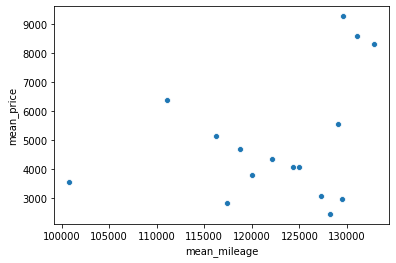

In [37]:
import seaborn as sns

sns.scatterplot(brand_df["mean_mileage"], brand_df["mean_price"])

At least from this dataframe and scatter plot, it doesn't look like there's a strong link, if any, between the average mileage of a brand's listings and the brands' listing average cost. If the link does exist, it doesn't appear to go in the direction we'd likely expect (possible that cars with higher mileage have higher price?? This initially doesn't appear to make sense)

Now, let's look at the columns with null entries

In [38]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48206 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        48206 non-null  object
 1   name                48206 non-null  object
 2   seller              48206 non-null  object
 3   offer_type          48206 non-null  object
 4   price               48206 non-null  int32 
 5   abtest              48206 non-null  object
 6   vehicle_type        43804 non-null  object
 7   registration_year   48206 non-null  int64 
 8   gearbox             46012 non-null  object
 9   power_ps            48206 non-null  int64 
 10  model               45818 non-null  object
 11  odometer_km         48206 non-null  int32 
 12  registration_month  48206 non-null  int64 
 13  fuel_type           44341 non-null  object
 14  brand               48206 non-null  object
 15  unrepaired_damage   39336 non-null  object
 16  ad_created          48

In [40]:
autos["vehicle_type"].value_counts(dropna=False, normalize=True)

limousine     0.260528
kleinwagen    0.217774
kombi         0.184790
NaN           0.091316
bus           0.083475
cabrio        0.062399
coupe         0.050969
suv           0.040700
andere        0.008049
Name: vehicle_type, dtype: float64

It seems as if a significant proportion of the vehicle type column has no categorization, so we will give it a designation of "type unknown" rather than dropping

In [42]:
autos.loc[autos["vehicle_type"].isna(), "vehicle_type"] = "type unknown"
autos["vehicle_type"].value_counts(dropna=False, normalize=True)

limousine       0.260528
kleinwagen      0.217774
kombi           0.184790
type unknown    0.091316
bus             0.083475
cabrio          0.062399
coupe           0.050969
suv             0.040700
andere          0.008049
Name: vehicle_type, dtype: float64

In [43]:
autos["gearbox"].value_counts(dropna=False, normalize=True)

manuell      0.745177
automatik    0.209310
NaN          0.045513
Name: gearbox, dtype: float64

If this were a smaller percentage of entries, we could either search into which kinds of shift the unknown entries had, or dropped the rows entirely, but we will instead similarly assign an unknown designation here

In [44]:
autos.loc[autos["gearbox"].isna(), "gearbox"] = "unknown"

In [45]:
autos["model"].value_counts(dropna=False, normalize=True)

golf          0.080384
andere        0.070780
3er           0.055450
NaN           0.049537
polo          0.034664
                ...   
kappa         0.000041
200           0.000021
i3            0.000021
b_max         0.000021
rangerover    0.000021
Name: model, Length: 246, dtype: float64

It's surprising to see the prevalence of missing entries in the model column. Let's see if it's possible to extract the model from the car's name

In [46]:
autos[autos["model"].isna()].head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
10,2016-03-15 01:41:36,VW_Golf_Tuning_in_siber/grau,privat,Angebot,999,test,type unknown,2017,manuell,90,NaN,150000,4,benzin,volkswagen,nein,2016-03-14 00:00:00,0,86157,2016-04-07 03:16:21
11,2016-03-16 18:45:34,Mercedes_A140_Motorschaden,privat,Angebot,350,control,type unknown,2000,unknown,0,NaN,150000,0,benzin,mercedes_benz,NaN,2016-03-16 00:00:00,0,17498,2016-03-16 18:45:34
15,2016-04-01 12:06:20,Corvette_C3_Coupe_T_Top_Crossfire_Injection,privat,Angebot,18900,test,coupe,1982,automatik,203,NaN,80000,6,benzin,sonstige_autos,nein,2016-04-01 00:00:00,0,61276,2016-04-02 21:10:48
23,2016-03-10 19:55:34,Peugeot_Boxer_2_2_HDi_120_Ps_9_Sitzer_inkl_Klima,privat,Angebot,7999,control,bus,2010,manuell,120,NaN,150000,2,diesel,peugeot,nein,2016-03-10 00:00:00,0,30900,2016-03-17 08:45:17
41,2016-03-10 10:46:08,Passat_3b_1.9_TDI_Highline__angemeldet_mit_tuv...,privat,Angebot,3200,test,kombi,2003,manuell,131,NaN,150000,7,NaN,volkswagen,nein,2016-03-10 00:00:00,0,28259,2016-04-06 20:19:08


It doesn't look like there's any easy standard string manipulation to give us the model, and, as well, there's a wide dispersion of values in the column to begin with. Let's drop the column entirely, since it doesn't really give us much workable information

In [47]:
autos.drop("model", axis=1, inplace=True)

In [48]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48206 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        48206 non-null  object
 1   name                48206 non-null  object
 2   seller              48206 non-null  object
 3   offer_type          48206 non-null  object
 4   price               48206 non-null  int32 
 5   abtest              48206 non-null  object
 6   vehicle_type        48206 non-null  object
 7   registration_year   48206 non-null  int64 
 8   gearbox             48206 non-null  object
 9   power_ps            48206 non-null  int64 
 10  odometer_km         48206 non-null  int32 
 11  registration_month  48206 non-null  int64 
 12  fuel_type           44341 non-null  object
 13  brand               48206 non-null  object
 14  unrepaired_damage   39336 non-null  object
 15  ad_created          48206 non-null  object
 16  nr_of_pictures      48

Now let's look at the last columns with missing information

In [49]:
autos["fuel_type"].value_counts(normalize=True, dropna=False)

benzin     0.605734
diesel     0.297307
NaN        0.080177
lpg        0.013836
cng        0.001473
hybrid     0.000768
elektro    0.000373
andere     0.000332
Name: fuel_type, dtype: float64

It's unlikely we can impute anything here, and there is useful information in this column, so once again we will give the missing values an unknown designation

In [50]:
autos.loc[autos["fuel_type"].isna(), "fuel_type"] = "type unknown"

In [51]:
autos["unrepaired_damage"].value_counts(normalize=True, dropna=False)

nein    0.719952
NaN     0.184002
ja      0.096046
Name: unrepaired_damage, dtype: float64

A very significant proportion of this column of binary information is unknown. If we wanted to try categorizing this with a supervised learning model, then we'd drop the rows with missing information, but just to keep the data as complete as possible for now, we will classify these entries as unknown

In [52]:
autos.loc[autos["unrepaired_damage"].isna(), "unrepaired_damage"] = "unknown"

In [53]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48206 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        48206 non-null  object
 1   name                48206 non-null  object
 2   seller              48206 non-null  object
 3   offer_type          48206 non-null  object
 4   price               48206 non-null  int32 
 5   abtest              48206 non-null  object
 6   vehicle_type        48206 non-null  object
 7   registration_year   48206 non-null  int64 
 8   gearbox             48206 non-null  object
 9   power_ps            48206 non-null  int64 
 10  odometer_km         48206 non-null  int32 
 11  registration_month  48206 non-null  int64 
 12  fuel_type           48206 non-null  object
 13  brand               48206 non-null  object
 14  unrepaired_damage   48206 non-null  object
 15  ad_created          48206 non-null  object
 16  nr_of_pictures      48

We have renamed the columns to be camelcase, converted the price and odometer columns to numeric, analyzed the dispersion of dates, found what the average price is for a given brand, got rid of entries with outliers in the price column, and taken care of all missing values. While there might be further cleaning left to do for specific analysis tasks, for a fundamental cleaning and basic analysis this seems to be sufficient.

In [55]:
autos.to_csv("cleaned_autos.csv")